In [43]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import warnings 
warnings.filterwarnings('ignore') # to hide warnings

# 1. Extract data

In [44]:
ticker = ['MSFT', 'AAPL', 'NVDA', 'AMZN', 'GOOG', 'META', 'TSLA']

hist_price = pd.DataFrame()

for i in ticker:
    stock = yf.Ticker(i)
    hist = stock.history(start="2013-01-01", end="2023-12-31")

    for j in ['close', 'high', 'low']:
        hist_price[f'{i}_{j}'] = hist[j.capitalize()]

In [45]:
hist_price

,MSFT_close,MSFT_high,MSFT_low,AAPL_close,AAPL_high,AAPL_low,NVDA_close,NVDA_high,NVDA_low,AMZN_close,...,AMZN_low,GOOG_close,GOOG_high,GOOG_low,META_close,META_high,META_low,TSLA_close,TSLA_high,TSLA_low
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02 00:00:00-05:00,22.492275,22.581852,22.109531,16.725029,16.906893,16.499605,0.293560,0.293791,0.288713,12.865500,...,12.663000,NaN,NaN,NaN,27.942579,28.122210,27.363769,2.357333,2.363333,2.314000
2013-01-03 00:00:00-05:00,22.190969,22.516708,22.117678,16.513935,16.744539,16.480426,0.293791,0.297022,0.290329,12.924000,...,12.818500,NaN,NaN,NaN,27.713053,28.411616,27.533422,2.318000,2.363333,2.316667
2013-01-04 00:00:00-05:00,21.775652,22.264261,21.767508,16.053942,16.408225,16.018300,0.303484,0.304407,0.293329,12.957500,...,12.832500,NaN,NaN,NaN,28.701021,28.870673,27.772928,2.293333,2.320000,2.261333
2013-01-07 00:00:00-05:00,21.734940,21.889665,21.694221,15.959508,16.124006,15.694480,0.294714,0.304176,0.292637,13.423000,...,13.133500,NaN,NaN,NaN,29.359669,29.728911,28.591247,2.289333,2.320000,2.260000
2013-01-08 00:00:00-05:00,21.620920,21.816365,21.547629,16.002457,16.202903,15.878779,0.288252,0.296329,0.286175,13.319000,...,13.178500,NaN,NaN,NaN,29.000406,29.539300,28.800818,2.245333,2.300000,2.207333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,373.215424,373.813244,371.352241,193.091385,194.896627,192.463035,48.823704,49.376630,48.460748,153.419998,...,152.710007,142.557770,143.087166,141.893517,352.665314,356.467498,350.499750,252.539993,258.220001,251.369995
2023-12-26 00:00:00-05:00,373.295135,375.566828,372.139358,192.542831,193.380621,192.323408,49.272640,49.593598,48.953681,153.410004,...,153.029999,142.657669,143.781390,142.338025,354.102325,356.247941,352.725181,256.609985,257.970001,252.910004
2023-12-27 00:00:00-05:00,372.707275,373.693659,371.451856,192.642548,192.991634,190.587962,49.410622,49.673588,49.078664,153.339996,...,153.119995,141.279236,143.157104,140.890670,357.096191,358.263806,354.581370,261.440002,263.339996,257.519989


# 2. Double Bollinger Band

### Calculate DBB

In [46]:
# define function to calculate DBB
def dbb(data):
    temp = pd.DataFrame()
    temp['Close'] = data

    # calculate SMA
    temp['SMA'] = temp['Close'].rolling(window=20).mean()

    # calculate standard deviation
    temp['SD'] = temp['Close'].rolling(window=20).std()

    # with 1 SD
    temp['UB1'] = temp['SMA'] + 1 * temp['SD'] 
    temp['LB1'] = temp['SMA'] - 1 * temp['SD']

    # with 2 SD
    temp['UB2'] = temp['SMA'] + 2 * temp['SD']
    temp['LB2'] = temp['SMA'] - 2 * temp['SD']

    temp.drop(columns=['SMA', 'SD'], inplace=True)

    return temp

In [47]:
dbb_data = pd.DataFrame()

for i in ticker:
    temp = dbb(hist_price[f'{i}_close'])

    dbb_data[i + '_UB1'] = temp['UB1']
    dbb_data[i + '_LB1'] = temp['LB1']
    dbb_data[i + '_UB2'] = temp['UB2']
    dbb_data[i + '_LB2'] = temp['LB2']
    dbb_data[i + '_Close'] = temp['Close']

In [48]:
dbb_data

,MSFT_UB1,MSFT_LB1,MSFT_UB2,MSFT_LB2,MSFT_Close,AAPL_UB1,AAPL_LB1,AAPL_UB2,AAPL_LB2,AAPL_Close,...,META_UB1,META_LB1,META_UB2,META_LB2,META_Close,TSLA_UB1,TSLA_LB1,TSLA_UB2,TSLA_LB2,TSLA_Close
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02 00:00:00-05:00,NaN,NaN,NaN,NaN,22.492275,NaN,NaN,NaN,NaN,16.725029,...,NaN,NaN,NaN,NaN,27.942579,NaN,NaN,NaN,NaN,2.357333
2013-01-03 00:00:00-05:00,NaN,NaN,NaN,NaN,22.190969,NaN,NaN,NaN,NaN,16.513935,...,NaN,NaN,NaN,NaN,27.713053,NaN,NaN,NaN,NaN,2.318000
2013-01-04 00:00:00-05:00,NaN,NaN,NaN,NaN,21.775652,NaN,NaN,NaN,NaN,16.053942,...,NaN,NaN,NaN,NaN,28.701021,NaN,NaN,NaN,NaN,2.293333
2013-01-07 00:00:00-05:00,NaN,NaN,NaN,NaN,21.734940,NaN,NaN,NaN,NaN,15.959508,...,NaN,NaN,NaN,NaN,29.359669,NaN,NaN,NaN,NaN,2.289333
2013-01-08 00:00:00-05:00,NaN,NaN,NaN,NaN,21.620920,NaN,NaN,NaN,NaN,16.002457,...,NaN,NaN,NaN,NaN,29.000406,NaN,NaN,NaN,NaN,2.245333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,376.129557,368.206927,380.090872,364.245612,373.215424,196.063064,190.256329,198.966432,187.352961,193.091385,...,344.885632,322.446048,356.105424,311.226256,352.665314,251.353381,237.653618,258.203263,230.803736,252.539993
2023-12-26 00:00:00-05:00,375.762138,368.180788,379.552814,364.390112,373.295135,196.085271,190.559267,198.848272,187.796265,192.542831,...,346.786254,322.554295,358.902233,310.438316,354.102325,252.586293,238.473705,259.642586,231.417411,256.609985
2023-12-27 00:00:00-05:00,374.642721,368.440350,377.743907,365.339165,372.707275,196.109351,190.809463,198.759295,188.159519,192.642548,...,348.711674,322.509014,361.813004,309.407684,357.096191,254.169737,238.362260,262.073476,230.458522,261.440002


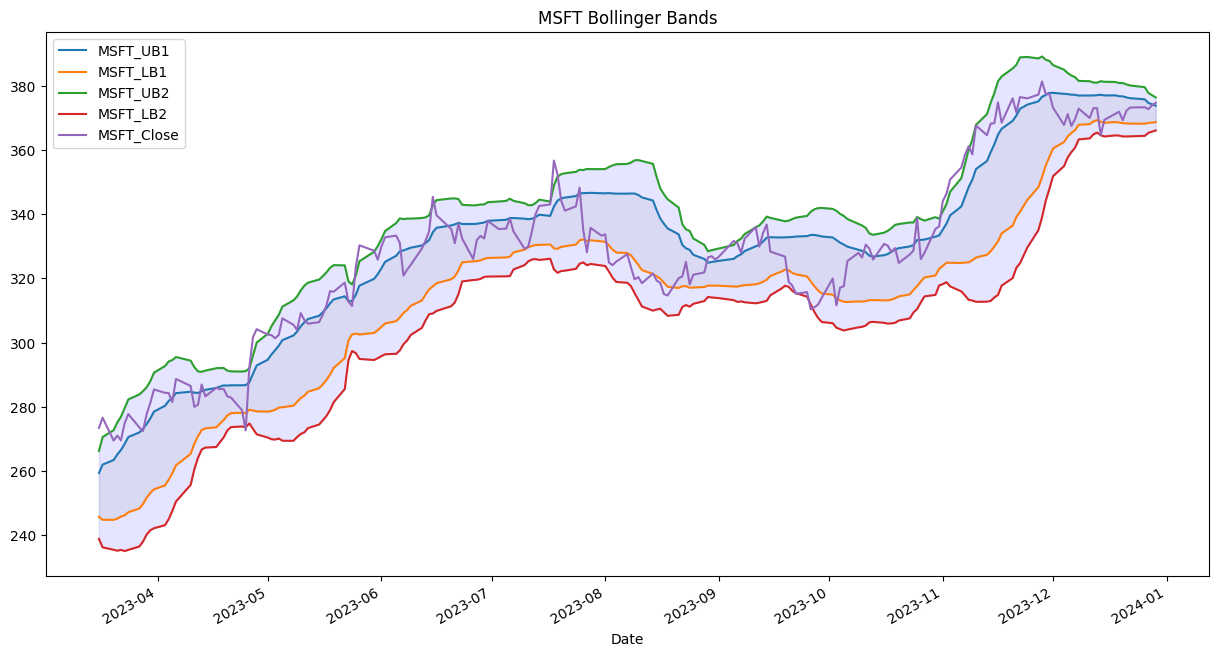

In [49]:
# visualization
temp = dbb_data[['MSFT_UB1', 'MSFT_LB1', 'MSFT_UB2', 'MSFT_LB2', 'MSFT_Close']]
temp = temp[-200:]
temp.plot(figsize=(15, 8), title='MSFT Bollinger Bands')
plt.fill_between(temp.index, temp['MSFT_UB1'], temp['MSFT_LB1'], color='grey', alpha=0.1)
plt.fill_between(temp.index, temp['MSFT_UB2'], temp['MSFT_LB2'], color='blue', alpha=0.1)

### Generate trading signals based on DBB

In [50]:
def generate_dbb_signals(ticker, data):
    temp = data.copy()
    temp = temp[['{}_UB1'.format(ticker), '{}_LB1'.format(ticker), '{}_UB2'.format(ticker), '{}_LB2'.format(ticker), '{}_Close'.format(ticker)]]
    temp['Signal'] = 0

    for i in range(0, len(temp)):
        if temp['{}_Close'.format(ticker)].iloc[i] > temp['{}_UB2'.format(ticker)].iloc[i]: # in buy zone
            temp['Signal'].iloc[i] = 2
        elif temp['{}_Close'.format(ticker)].iloc[i] < temp['{}_LB2'.format(ticker)].iloc[i]: # in sell zone
            temp['Signal'].iloc[i] = -2
        elif temp['{}_Close'.format(ticker)].iloc[i] > temp['{}_UB1'.format(ticker)].iloc[i]: # in buy zone
            temp['Signal'].iloc[i] = 1 
        elif temp['{}_Close'.format(ticker)].iloc[i] < temp['{}_LB1'.format(ticker)].iloc[i]: # in sell zone
            temp['Signal'].iloc[i] = -1

    return temp

In [51]:
dbb_signals = pd.DataFrame()

for t in ticker:
    signals = generate_dbb_signals(t, dbb_data)
    dbb_signals['{}_dbb'.format(t)] = signals['Signal']

In [52]:
dbb_signals

,MSFT_dbb,AAPL_dbb,NVDA_dbb,AMZN_dbb,GOOG_dbb,META_dbb,TSLA_dbb
Date,,,,,,,
2013-01-02 00:00:00-05:00,0,0,0,0,0,0,0
2013-01-03 00:00:00-05:00,0,0,0,0,0,0,0
2013-01-04 00:00:00-05:00,0,0,0,0,0,0,0
2013-01-07 00:00:00-05:00,0,0,0,0,0,0,0
2013-01-08 00:00:00-05:00,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,0,0,0,1,2,1,1
2023-12-26 00:00:00-05:00,0,0,1,1,1,1,1
2023-12-27 00:00:00-05:00,0,0,1,1,1,1,1


### Calculate MACD

In [53]:
def macd(data):
    temp['Close'] = data
    
    # Calculate the Short-term EMA (12-period)
    temp['EMA_12'] = temp['Close'].ewm(span=12, adjust=False).mean()
    
    # Calculate the Long-term EMA (26-period)
    temp['EMA_26'] = temp['Close'].ewm(span=26, adjust=False).mean()

    # Calculate MACD Line
    temp['MACD_Line'] = temp['EMA_12'] - temp['EMA_26']

    # Calculate Signal Line (9-period EMA of MACD Line)
    temp['Signal_Line'] = temp['MACD_Line'].ewm(span=9, adjust=False).mean()

    # Calculate MACD Histogram
    temp['MACD_Histogram'] = temp['MACD_Line'] - temp['Signal_Line']
    
    return temp['MACD_Histogram']

In [54]:
macd_data = pd.DataFrame()

for i in ticker:
    temp = macd(hist_price[f'{i}_close'])
    macd_data[f'{i}_macd'] = temp

macd_data

,MSFT_macd,AAPL_macd,NVDA_macd,AMZN_macd,GOOG_macd,META_macd,TSLA_macd
Date,,,,,,,
2023-03-16 00:00:00-04:00,0.000000,0.177869,0.010525,0.534342,0.810850,1.330808,-3.057318
2023-03-17 00:00:00-04:00,0.204081,0.253404,0.077012,0.700620,1.130680,1.086423,-2.702087
2023-03-20 00:00:00-04:00,-0.134093,0.424908,0.116761,0.695526,1.241470,0.948787,-2.153643
2023-03-21 00:00:00-04:00,-0.241249,0.613636,0.145311,0.845907,1.495629,1.020038,-0.792541
2023-03-22 00:00:00-04:00,-0.389517,0.590774,0.163100,0.776961,1.470406,0.789453,-0.316481
...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,-1.044311,-0.606204,0.069941,0.262905,0.844754,2.224545,0.802601
2023-12-26 00:00:00-05:00,-0.866438,-0.749459,0.073029,0.196478,0.912786,2.174393,0.859727
2023-12-27 00:00:00-05:00,-0.780408,-0.821584,0.074627,0.113434,0.812284,2.171781,1.116439


### Calculate RSI

In [55]:
def rsi(data, window=14):
    temp = pd.DataFrame()
    delta = data.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    temp['RSI'] = rsi
    return temp

In [56]:
rsi_data = pd.DataFrame()

for i in ticker:
    temp = rsi(hist_price[f'{i}_close'])
    rsi_data[f'{i}_rsi'] = temp

rsi_data

,MSFT_rsi,AAPL_rsi,NVDA_rsi,AMZN_rsi,GOOG_rsi,META_rsi,TSLA_rsi
Date,,,,,,,
2013-01-02 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03 00:00:00-05:00,0.000000,0.000000,100.000000,100.000000,NaN,0.000000,0.000000
2013-01-04 00:00:00-05:00,0.000000,0.000000,100.000000,100.000000,NaN,81.147641,0.000000
2013-01-07 00:00:00-05:00,0.000000,0.000000,53.086469,100.000000,NaN,87.766040,0.000000
2013-01-08 00:00:00-05:00,0.000000,5.312347,39.449650,84.278141,NaN,73.660746,0.000000
...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,56.647138,59.246150,64.502652,67.919790,74.016655,77.739038,64.737564
2023-12-26 00:00:00-05:00,52.844271,49.031945,62.503459,64.901866,72.182037,80.521245,65.298430
2023-12-27 00:00:00-05:00,57.639878,52.291470,69.719870,72.477032,70.915196,82.554065,67.613726


# 3 & 4. Back Testing and Performance Metrics

In [57]:
# combined all necessary data together
data_combined = pd.concat([hist_price, dbb_data, dbb_signals, macd_data, rsi_data], axis=1)
data_combined.dropna(inplace=True)
data_combined

,MSFT_close,MSFT_high,MSFT_low,AAPL_close,AAPL_high,AAPL_low,NVDA_close,NVDA_high,NVDA_low,AMZN_close,...,GOOG_macd,META_macd,TSLA_macd,MSFT_rsi,AAPL_rsi,NVDA_rsi,AMZN_rsi,GOOG_rsi,META_rsi,TSLA_rsi
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-16 00:00:00-04:00,273.458374,273.814786,260.666608,154.812546,155.418486,150.630564,25.530714,25.577694,23.884376,100.040001,...,0.810850,1.330808,-3.057318,76.286042,66.581947,65.074643,66.498489,76.856083,83.417116,41.619562
2023-03-17 00:00:00-04:00,276.656250,280.517531,273.577136,153.968201,155.696623,153.252992,25.714640,26.388368,25.657662,98.949997,...,1.130680,1.086423,-2.702087,77.298981,63.014643,64.929724,62.566572,77.515565,71.670813,30.164457
2023-03-20 00:00:00-04:00,269.527740,274.725627,267.171361,156.352249,156.769467,153.123883,25.889570,26.013521,25.119880,97.709999,...,1.241470,0.948787,-2.153643,68.986209,67.170850,68.281228,58.123240,75.515562,70.079001,34.075436
2023-03-21 00:00:00-04:00,271.062347,272.270238,266.844624,158.219711,158.338908,155.497945,26.188450,26.381373,25.370780,100.610001,...,1.495629,1.020038,-0.792541,73.524870,74.194611,74.568779,68.957782,78.935433,74.038132,46.831887
2023-03-22 00:00:00-04:00,269.587189,278.250334,269.478265,156.779388,161.060696,156.759517,26.457338,27.577887,26.226430,98.699997,...,1.470406,0.789453,-0.316481,69.212679,70.053831,73.268716,63.613760,72.633996,70.714509,50.163463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,373.215424,373.813244,371.352241,193.091385,194.896627,192.463035,48.823704,49.376630,48.460748,153.419998,...,0.844754,2.224545,0.802601,56.647138,59.246150,64.502652,67.919790,74.016655,77.739038,64.737564
2023-12-26 00:00:00-05:00,373.295135,375.566828,372.139358,192.542831,193.380621,192.323408,49.272640,49.593598,48.953681,153.410004,...,0.912786,2.174393,0.859727,52.844271,49.031945,62.503459,64.901866,72.182037,80.521245,65.298430
2023-12-27 00:00:00-05:00,372.707275,373.693659,371.451856,192.642548,192.991634,190.587962,49.410622,49.673588,49.078664,153.339996,...,0.812284,2.171781,1.116439,57.639878,52.291470,69.719870,72.477032,70.915196,82.554065,67.613726


In [58]:
# function to carry out the trading strategy and perform backtesting
def backtest(ticker, data, initial_capital = 10000):
    cash = initial_capital
    num_shares = 0
    capital_hist = []
    action_hist = []

    stop_loss = None
    entry_price = None
    target = None

    for i in range(len(data)):
        close = data[f'{ticker}_close'].iloc[i]
        low = data[f'{ticker}_low'].iloc[i]
        high = data[f'{ticker}_high'].iloc[i]

        upper = data[f'{ticker}_UB1'].iloc[i]
        lower = data[f'{ticker}_LB1'].iloc[i]

        dbb_signal = data[f'{ticker}_dbb'].iloc[i]
        macd_signal = data[f'{ticker}_macd'].iloc[i]
        rsi_signal = data[f'{ticker}_rsi'].iloc[i]

        prev_signal = data[f'{ticker}_dbb'].iloc[i-1] if i > 0 else None
        prev_action = (action if action != 0 else prev_action) if i > 0 else None
        action = 0
        

        # if trend is outside DBB, the trend might be exhausting 
        # use MACD to confirm the trend

        if dbb_signal == 2 and num_shares > 0 and macd_signal < 0:
            # to sell
            action = -1 if num_shares > 0 else 0
            cash += num_shares * (close * 0.99875)
            num_shares = 0

            action_hist.append(action)
            capital = cash + num_shares * close
            capital_hist.append(capital)
            
            continue
        
        elif dbb_signal == -2 and macd_signal > 0:
            new_shares = math.floor(cash / (close * 1.00125))
            num_shares += new_shares
            cash -= new_shares * (close * 1.00125)
            action = 1 if new_shares > 0 else 0

            action_hist.append(action)
            capital = cash + num_shares * close
            capital_hist.append(capital)

            continue

        # in buy zone

        if dbb_signal == 1 or dbb_signal == 2:
            # buy when the trend first enter buy zone or at the dip
            if (prev_signal == 0) or (low < upper and rsi_signal < 30):
                new_shares = math.floor(cash / (close * 1.00125))
                num_shares += new_shares
                cash -= new_shares * (close * 1.00125)
                action = 1 if new_shares > 0 else 0

                # set stop loss and entry point only when first entering the buy zone
                if (prev_signal == 0):
                    stop_loss = low
                    entry_price = close
                else:
                    # if buying again, check if need to update stop loss
                    stop_loss = entry_price if close - entry_price >= entry_price - stop_loss else stop_loss

            else:
                # if hit stop loss --> sell
                if stop_loss is not None and close <= stop_loss:
                    action = -1 if num_shares > 0 else 0
                    cash += num_shares * (close * 0.99875)
                    num_shares = 0

                # else, update stop loss if needed (breakeven)
                elif stop_loss is not None and close - entry_price >= entry_price - stop_loss:
                    stop_loss = entry_price 

        # in sell zone
        elif dbb_signal == -1 or dbb_signal == -2:
            # sell when the trend first enter sell zone or at the peak
            if (prev_signal == 0) or (high > lower and rsi_signal > 70):
                action = -1 if num_shares > 0 else 0
                cash += num_shares * (close * 0.99875)
                num_shares = 0 

                # set stop loss, entry point and target if first entering the sell zone
                if (prev_signal == 0):
                    stop_loss = high
                    entry_price = close
                    target = entry_price - (stop_loss - entry_price) * 2
                else:
                    # if selling again, check if need to update stop loss
                    stop_loss = entry_price if stop_loss - close >= entry_price - stop_loss else stop_loss

            else:
                # if hit stop loss --> buy
                if (stop_loss is not None and close >= stop_loss) or (target is not None and close <= target):
                    new_shares = math.floor(cash / (close * 1.00125))
                    num_shares += new_shares
                    cash -= new_shares * (close * 1.00125)
                    action = 1 if new_shares > 0 else 0

                # else, update stop loss if needed (breakeven)
                elif stop_loss is not None and entry_price - close >= stop_loss - entry_price :
                    stop_loss = entry_price


        # in neutral zone, take action based on rsi_signal
        elif dbb_signal == 0:
            if prev_signal == 1 and num_shares > 0 and rsi_signal > 80:
                action = -1 if num_shares > 0 else 0
                cash += num_shares * (close * 0.99875)
                num_shares = 0

            elif prev_signal == -1 and rsi_signal < 20:
                new_shares = math.floor(cash / (close * 1.00125))
                num_shares += new_shares
                cash -= new_shares * (close * 1.00125)
                action = 1 if new_shares > 0 else 0

            # reset
            stop_loss = None
            entry_price = None
            target = None
            
        action_hist.append(action)

        capital = cash + num_shares * close
        capital_hist.append(capital)

    return capital_hist, action_hist

In [59]:
results = pd.DataFrame()
results['Date'] = data_combined.index
results.set_index('Date', inplace=True)

for t in ticker:
    capital_hist, action_hist = backtest(t, data_combined)
    results[f'{t}_capital'] = capital_hist
    results[f'{t}_action'] = action_hist

In [60]:
# function to visualize backtesting results
def plot(ticker, results, data, dbb = None, period = None):
    temp = pd.DataFrame()
    temp['close'] = data[f'{ticker}_close']
    temp['action'] = results[f'{ticker}_action']

    if dbb is not None:
        temp['UB1'] = dbb[f'{ticker}_UB1']
        temp['LB1'] = dbb[f'{ticker}_LB1']
        temp['UB2'] = dbb[f'{ticker}_UB2']
        temp['LB2'] = dbb[f'{ticker}_LB2']

    if period is not None:
        temp = temp[-period:]

    temp[['close', 'UB1', 'UB2', 'LB1', 'LB2']].plot(figsize=(15, 8), title=ticker)
    for i in range(len(temp)):
        if temp['action'].iloc[i] == 1: # buy
            plt.axvline(x=temp['close'].index[i], color='r', linestyle='--')
        elif temp['action'].iloc[i] == -1: # sell
            plt.axvline(x=temp['close'].index[i], color='g', linestyle='--')

    plt.fill_between(temp.index, temp['UB1'], temp['LB1'], color='grey', alpha=0.1)
    plt.fill_between(temp.index, temp['UB2'], temp['LB2'], color='blue', alpha=0.1)

In [61]:
# function to compute performance metrics
def compute_performance_metrics(capital_history, initial_capital=10000):
    capital_history = np.array(capital_history)

    # total return
    total_return = (capital_history[-1] - initial_capital) / initial_capital
    
    # annualized return
    num_periods = len(capital_history) / 252  # assuming daily data and 252 trading days per year
    annual_return = ((capital_history[-1] / initial_capital) ** (1 / num_periods)) - 1
    
    # returns and volatility
    returns = np.diff(capital_history) / capital_history[:-1]
    volatility = np.std(returns) * np.sqrt(252)

    # Sharpe Ratio
    sharpe_ratio = annual_return / volatility if volatility != 0 else np.nan

     # Sortino Ratio
    downside_returns = returns[returns < 0]
    downside_deviation = np.std(downside_returns) * np.sqrt(252)
    sortino_ratio = annual_return / downside_deviation if downside_deviation != 0 else np.nan
    
    # maximum drawdown
    peak = np.maximum.accumulate(capital_history)
    drawdowns = (capital_history - peak) / peak
    max_drawdown = np.min(drawdowns)
    
    return {
        'Total Return': total_return,
        'Annual Return': annual_return,
        'Annual Volatility': volatility,
        'Sharpe Ratio': sharpe_ratio,
        'Sortino Ratio': sortino_ratio,
        'Maximum Drawdown': max_drawdown,
        'Final Value': capital_history[-1]
    }

metrics = {}

for t in ticker:
    metrics[t] = compute_performance_metrics(results[f'{t}_capital'])

# Display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

                           MSFT          AAPL          NVDA          AMZN  \
Total Return           0.101065      0.212353      0.290232      0.323660   
Annual Return          0.128975      0.274597      0.378610      0.423764   
Annual Volatility      0.182956      0.166119      0.388743      0.225115   
Sharpe Ratio           0.704951      1.653017      0.973933      1.882432   
Sortino Ratio          0.912807      2.168147      1.709806      2.447953   
Maximum Drawdown      -0.119972     -0.121232     -0.245443     -0.120501   
Final Value        11010.648556  12123.534806  12902.320748  13236.595369   

                           GOOG          META          TSLA  
Total Return           0.132184      0.442495      0.668260  
Annual Return          0.169326      0.586661      0.905691  
Annual Volatility      0.238264      0.220497      0.402606  
Sharpe Ratio           0.710665      2.660629      2.249571  
Sortino Ratio          0.828049      3.636401      3.014678  
Maximum Dra